## 목표: Wine 품질 모델
- 데이터 : UCI Machine's winequality=white.csv
- 피쳐 : fixed acidity, volatile acidity
- 타겟 : quality

(1) 모듈 로딩 & 데이터 <hr>

In [67]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [68]:

data_file=('wine.csv')

In [76]:
wineDF=pd.read_csv(data_file,delimiter=';',usecols=[8,10,11])
wineDF

,pH,alcohol,quality
0,3.00,8.8,6
1,3.30,9.5,6
2,3.26,10.1,6
3,3.19,9.9,6
4,3.19,9.9,6
...,...,...,...
4893,3.27,11.2,6
4894,3.15,9.6,5
4895,2.99,9.4,6
4896,3.34,12.8,7


(2) 데이터 전처리 <hr>

In [78]:
# 중복값 제거
wineDF.drop_duplicates()
wineDF.describe()

,pH,alcohol,quality
count,4898.000000,4898.000000,4898.000000
mean,3.188267,10.514267,5.877909
std,0.151001,1.230621,0.885639
min,2.720000,8.000000,3.000000
25%,3.090000,9.500000,5.000000
50%,3.180000,10.400000,6.000000
75%,3.280000,11.400000,6.000000
max,3.820000,14.200000,9.000000


(3) 기계학습 데이터셋 준비 => 피쳐와 타겟 분리 <hr>

In [83]:
featureDF=wineDF[wineDF.columns[0:2]]
featureDF.head(2)

,pH,alcohol
0,3.0,8.8
1,3.3,9.5


In [84]:
targetDF=wineDF['quality']
targetDF.head(2)

0    6
1    6
Name: quality, dtype: int64

(3-1) 학습 / 테스트 데이터셋 분리 <hr>

In [85]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [90]:
x_train, x_test, y_train, y_test = train_test_split(featureDF,targetDF,test_size=0.3,stratify=targetDF)

In [91]:
# 학습 및 테스트 데이터셋 확인
print(f'학습용 데이터셋 ---> \n{x_train.shape},{y_train.shape}')
print(f'\n{y_train.value_counts()/y_train.shape[0]}')
print(f'테스트용 데이터셋 ---> \n{x_test.shape},{y_test.shape}')
print(f'\n{y_test.value_counts()/y_test.shape[0]}')

학습용 데이터셋 ---> 
(3428, 2),(3428,)

quality
6    0.448658
5    0.297550
7    0.179697
8    0.035589
4    0.033256
3    0.004084
9    0.001167
Name: count, dtype: float64
테스트용 데이터셋 ---> 
(1470, 2),(1470,)

quality
6    0.448980
5    0.297279
7    0.179592
8    0.036054
4    0.033333
3    0.004082
9    0.000680
Name: count, dtype: float64


(3-2) 피쳐 데이터의 스케일링 <hr>

In [92]:
#모듈로딩
from sklearn.preprocessing import StandardScaler

In [93]:
# 표준정규분포 스케일링 : 평균 0, 편차 1
# (1) 스케일러 인스턴스 생성
# (2) 데이터에 대한 평균, 표준편차 계산 진행 : fit()메서드
# (3) 데이터에 대한 스케일링 진행 : transform() 메서드

In [94]:
scaler = StandardScaler()

In [96]:
scaler.fit(x_train)

StandardScaler()

In [97]:
scaler.mean_

array([ 3.18641774, 10.52443213])

In [99]:
scaler.transform(x_train)

array([[-0.24410856, -0.90754826],
       [ 0.02401196, -0.98825996],
       [ 0.09104209, -0.74612486],
       ...,
       [ 1.09649404, -0.01971958],
       [-0.37816882,  1.59451437],
       [ 2.30303639,  1.59451437]])

In [100]:
# 학습용 데이터 피쳐 스케일링
scaled_x_train=scaler.transform(x_train)
scaled_x_train.shape

(3428, 2)

In [101]:
# 테스트용 데이터 피쳐 스케일링
scaled_x_test=scaler.transform(x_test)
scaled_x_test.shape


(1470, 2)

(3-3) 시각화

In [102]:
# 모듈 로딩
import matplotlib.pyplot as plt

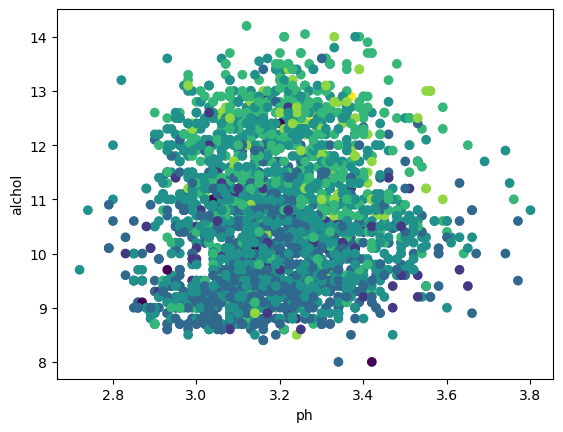

In [106]:
# 원본 데이터 시각화
plt.scatter(x_train.pH,x_train.alcohol,c=y_train)
plt.xlabel('ph')
plt.ylabel('alchol')
plt.show()

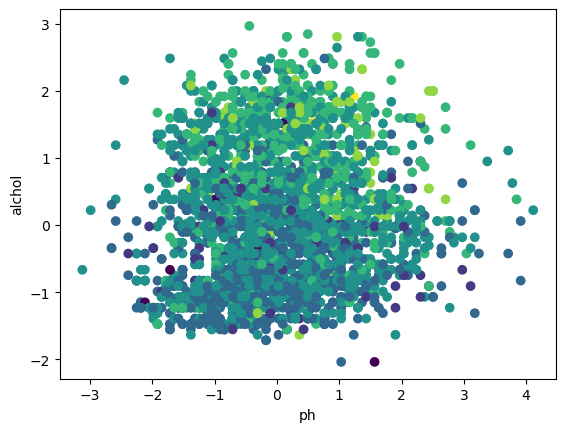

In [107]:
## 스케일된 데이터 시각화 ==> scaled_x_train
plt.scatter(scaled_x_train[:,0],scaled_x_train[:,1],c=y_train)
plt.xlabel('ph')
plt.ylabel('alchol')
plt.show()

(4) 학습진행

In [111]:
## 방법 (1) : KNN 알고리즘
## 모델 성능 좌우하는 매개변수 => 하이퍼파라미터 : n_neighbors
## n_neighbors 즉 k 갯수 : 1~ 전체 데이터 수
max_k =scaled_x_train.shape[0]

test_scorelist=[]
train_scorelist=[]
for k in range(1,100):
    
    fishmodel=KNeighborsClassifier(n_neighbors=k)
    fishmodel.fit(scaled_x_train,y_train)
    
    test_scorelist.append(fishmodel.score(scaled_x_test,y_test))
    train_scorelist.append(fishmodel.score(scaled_x_train,y_train))

In [112]:
# 학습 및 테스트 데이터에 대한 점수 확인
print(f'train_score: {train_scorelist}')
print(f'test_score: {test_scorelist}')

train_score: [0.7575845974329055, 0.6712368728121354, 0.6831971995332555, 0.6549008168028004, 0.6365227537922987, 0.618144690781797, 0.6093932322053676, 0.5939323220536756, 0.5924737456242707, 0.5781796966161027, 0.5746791131855309, 0.5714702450408401, 0.5618436406067678, 0.5638856476079347, 0.55950991831972, 0.5557176196032673, 0.5472578763127188, 0.5469661610268378, 0.544924154025671, 0.543465577596266, 0.5396732788798133, 0.5472578763127188, 0.5344224037339557, 0.5285880980163361, 0.5280046674445741, 0.5341306884480747, 0.5332555425904317, 0.5312135355892649, 0.529463243873979, 0.5312135355892649, 0.5280046674445741, 0.5332555425904317, 0.5265460910151692, 0.5335472578763127, 0.529463243873979, 0.5338389731621938, 0.5280046674445741, 0.5230455075845974, 0.5221703617269545, 0.5183780630105017, 0.5198366394399067, 0.5157526254375729, 0.5140023337222871, 0.51487747957993, 0.514294049008168, 0.5116686114352392, 0.5137106184364061, 0.5186697782963827, 0.5212952158693116, 0.52042007001166

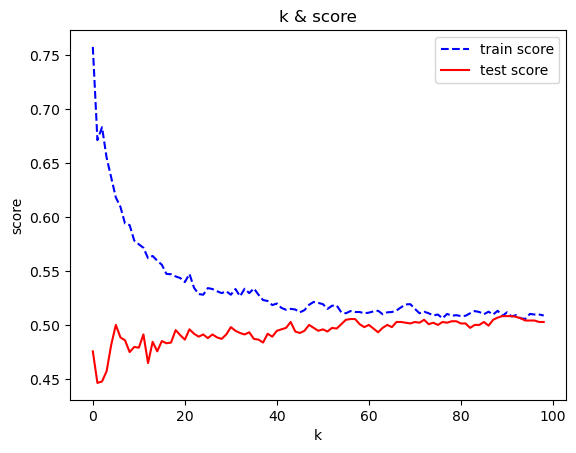

In [113]:
# k 갯수에 따른 학습옹/테스트용 점수 시각화
plt.plot(train_scorelist,'b--',label='train score')
plt.plot(test_scorelist,'r-',label='test score')
plt.title("k & score")
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.show()

In [114]:
## 방법 2: SVC
from sklearn.svm import SVC
fishmodel2=SVC()
fishmodel2.fit(scaled_x_train,y_train)

SVC()

In [115]:
## 방법 3:
from sklearn.linear_model import LogisticRegression
fishmodel3=LogisticRegression()
fishmodel3.fit(scaled_x_train,y_train)

LogisticRegression()

(5) 테스트 진행 <hr>

In [117]:
print('KNN:',fishmodel.score(scaled_x_test,y_test))
print('SVC:',fishmodel2.score(scaled_x_test,y_test))
print('LogisticRegression:',fishmodel3.score(scaled_x_test,y_test))


KNN: 0.5027210884353741
SVC: 0.5020408163265306
LogisticRegression: 0.49795918367346936


(6) 예측 <hr>

In [122]:
pH=float(input("pH(2.7~3.8) : "))
alcohol=float(input("alcohol(8.0~14.2) : "))
new_data=pd.DataFrame([[pH,alcohol]],columns=wineDF.columns[:2])
new_data

,pH,alcohol
0,2.7,8.0


In [123]:
# 피쳐 스케일링 진행
scaled_new_data = scaler.transform(new_data)

In [125]:
# 예측
y_pred=fishmodel.predict(scaled_new_data)
y_pred

array([6], dtype=int64)